# TD 12 : visualisation des données

In [1]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pyensae
%nb_menu -l1=1

Populating the interactive namespace from numpy and matplotlib


## Matplotlib, pandas

### Récupération des données

On récupère les données disponibles sur le site de l'INSEE : [Naissance, décès, mariages 2012](http://www.insee.fr/fr/themes/detail.asp?ref_id=fd-etatcivil2012&page=fichiers_detail/etatcivil2012/doc/documentation.htm). Il s'agit de récupérer la liste des mariages de l'année 2012. On souhaite représenter le graphe du nombre de mariages en fonction de l'écart entre les mariés.

In [1]:
import pyensae
files = ["etatcivil2012_nais2012_dbase.zip",
         "etatcivil2012_dec2012_dbase.zip",
         "etatcivil2012_mar2012_dbase.zip" ]
pyensae.download_data(files[-1], 
              website = 'http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/')
df = pyensae.dBase2df("mar2012.dbf")
print(df.shape, df.columns)
df.head()

    downloading of  http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/etatcivil2012_mar2012_dbase.zip  to  etatcivil2012_mar2012_dbase.zip
    unzipped  mar2012.dbf  to  .\mar2012.dbf
    unzipped  varlist_mariages.dbf  to  .\varlist_mariages.dbf
    unzipped  varmod_mariages.dbf  to  .\varmod_mariages.dbf
    unzipped  lisezmoi_MAR2012.txt  to  .\lisezmoi_MAR2012.txt
(246123, 16) Index(['AMAR', 'ANAISF', 'ANAISH', 'DEPDOM', 'DEPMAR', 'DEPNAISF', 'DEPNAISH', 'ETAMATF', 'ETAMATH', 'INDNATF', 'INDNATH', 'JSEMAINE', 'MMAR', 'NBENFCOM', 'TUCOM', 'TUDOM'], dtype='object')


,AMAR,ANAISF,ANAISH,DEPDOM,DEPMAR,DEPNAISF,DEPNAISH,ETAMATF,ETAMATH,INDNATF,INDNATH,JSEMAINE,MMAR,NBENFCOM,TUCOM,TUDOM
0,2012,1984,1982,99,29,99,75,1,1,2,1,1,01,N,,9
1,2012,1969,1956,99,75,99,69,4,4,2,2,3,01,N,,9
2,2012,1992,1982,99,34,99,99,1,1,1,2,5,01,N,,9
3,2012,1987,1985,99,13,84,99,1,1,1,2,4,01,N,,9
4,2012,1963,1968,99,26,99,99,1,1,2,2,6,01,N,,9


On récupère de la même manière la signification des variables :

In [2]:
import pyensae
vardf = pyensae.dBase2df("varlist_mariages.dbf")
print(vardf.shape, vardf.columns)
vardf

(16, 4) Index(['LIBELLE', 'LONGUEUR', 'TYPE', 'VARIABLE'], dtype='object')


,LIBELLE,LONGUEUR,TYPE,VARIABLE
0,Année du mariage,4,CHAR,AMAR
1,Année de naissance de l'épouse,4,CHAR,ANAISF
2,Année de naissance de l'époux,4,CHAR,ANAISH
3,Département de domicile après le mariage,3,CHAR,DEPDOM
4,Département de mariage,3,CHAR,DEPMAR
5,Département de naissance de l'épouse,3,CHAR,DEPNAISF
6,Département de naissance de l'époux,3,CHAR,DEPNAISH
7,État matrimonial antérieur de l'épouse,1,CHAR,ETAMATF
8,État matrimonial antérieur de l'époux,1,CHAR,ETAMATH
9,Indicateur de nationalité de l'épouse,1,CHAR,INDNATF


### Exercice 1 : écart entre les mariés

1. En ajoutant une colonne et en utilisant l'opération [group by](http://pandas.pydata.org/pandas-docs/stable/groupby.html), on veut obtenir la distribution du nombre de mariages en fonction de l'écart entre les mariés. Au besoin, on changera le type d'une colone ou deux.
2. On veut tracer un nuage de points avec en abscisse l'âge du mari, en ordonnée, l'âge de la femme. Il faudra peut-être jeter un coup d'oeil sur la documentation de la méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).

In [ ]:
df["colonne"] = df.apply (lambda r:  int(r["colonne"]), axis=1)  # pour changer de type
df["difference"] = ...

### Exercice 2 : graphe de la distribution avec pandas

Le module ``pandas`` propose un panel de graphiques standard faciles à obtenir. On souhaite représenter la distribution sous forme d'histogramme. A vous de choisir le meilleure graphique depuis la page [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

In [ ]:
df.plot (...)

### matplotlib

[matplotlib](http://matplotlib.org/) est le module qu'utilise [pandas](http://pandas.pydata.org/). Ainsi, la méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) retourne un objet de type [Axes](http://matplotlib.org/api/axes_api.html#module-matplotlib.axes) qu'on peut modifier par la suite via les [méthodes suivantes](http://matplotlib.org/api/pyplot_summary.html). On peut ajouter un titre avec [set_title](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_title) ou ajouter une grille avec [grid](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.grid). On peut également superposer [deux courbes sur le même graphique](http://stackoverflow.com/questions/19941685/how-to-show-a-bar-and-line-graph-on-the-same-plot), ou [changer de taille de caractères](http://stackoverflow.com/questions/12444716/how-do-i-set-figure-title-and-axes-labels-font-size-in-matplotlib). Le code suivant trace le nombre de mariages par département.

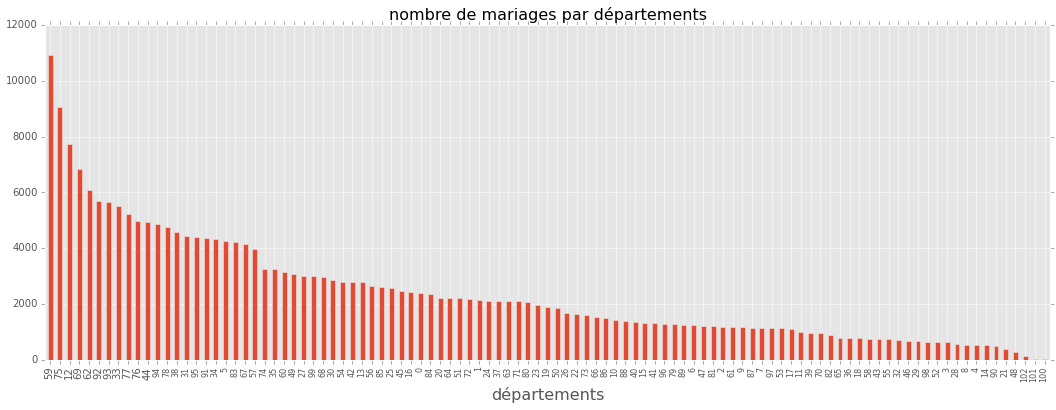

In [6]:
df["nb"] = 1
dep = df[["DEPMAR","nb"]].groupby("DEPMAR", as_index=False).sum().sort("nb",ascending=False)
ax = dep.plot(kind = "bar", figsize=(18,6))
ax.set_xlabel("départements", fontsize=16)
ax.set_title("nombre de mariages par départements", fontsize=16)
ax.legend().set_visible(False)  # on supprime la légende

# on change la taille de police de certains labels
for i,tick in enumerate(ax.xaxis.get_major_ticks()):
    if i > 10 :
        tick.label.set_fontsize(8) 

Quand on ne sait pas, le plus simple est d'utiliser un moteur de recherche avec un requête du type : ``matplotlib + requête``. Pour créer un graphique, le plus courant est de choisir le graphique le plus ressemblant d'une [gallerie de graphes](http://matplotlib.org/gallery.html) puis de l'adapter à vos données.

### Exercice 3 : distribution des mariages par jour
    
On veut obtenir un graphe qui contient l'histogramme de la distribution du nombre de mariages par jour de la semaine et d'ajouter une seconde courbe correspond avec un second axe à la répartition cumulée.

## Autres alternatives

### ggplot

Le module [ggplot](https://github.com/yhat/ggplot) est inspiré du module [ggplot2](http://ggplot2.org/) pour [R](http://www.r-project.org/). Il reprend la même charte graphique et une syntaxe similaire. Les graphiques produits sont plus lisibles et plus faciles à construire.

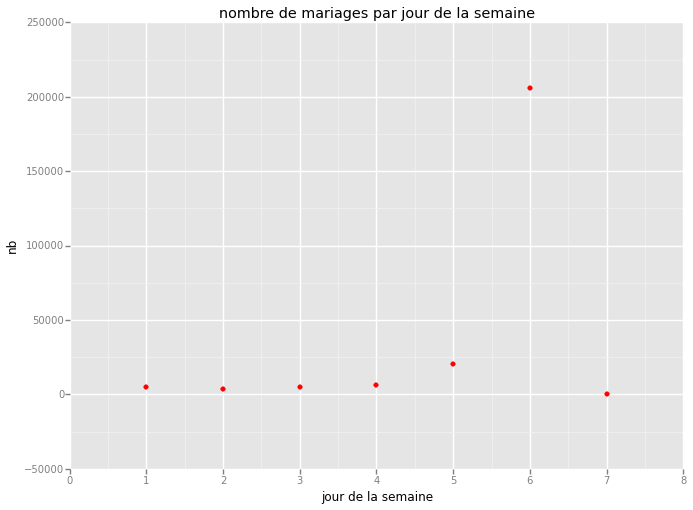

<ggplot: (12013495)>

In [7]:
from ggplot import *
df["nb"] = 1
dep = df[["JSEMAINE","nb"]].groupby("JSEMAINE", as_index=False).sum().sort("JSEMAINE",ascending=False)
ggplot(aes(x='JSEMAINE', y='nb'), data=dep) + \
    geom_point(color='red') + \
    ggtitle("nombre de mariages par jour de la semaine") + \
    xlab("jour de la semaine")

### Exercice 4 : même graphique avec ggplot
    
On veut obtenir un graphique similaire qui contient l'histogramme de la distribution du nombre de mariages par jour de la semaine et la répartition cumulée sur deux graphiques séparées mais avec [ggplot](https://github.com/yhat/ggplot). Vous trouverez quelques exemples sur la page [ggplot for python](http://blog.yhathq.com/posts/ggplot-for-python.html) et [exemples avec la version 0.4](http://blog.yhathq.com/posts/ggplot-0.4-released.html). Ce module est moins complet que la version de [R.ggplot2](http://ggplot2.org/) mais il utilise presque la même syntaxe : [documentation ggplot2](http://docs.ggplot2.org/current/). Vous aurez besoin de la fonction [facet_wrap](http://docs.ggplot2.org/current/facet_wrap.html) et peut-être aussi besoin de regarder l'exemple [How do I create a bar chart in python ggplot?](http://stackoverflow.com/questions/22599521/how-do-i-create-a-bar-chart-in-python-ggplot).

Cet exercice est plus une façon de découvrir un nouveau module. La solution la plus simple consiste néanmoins à changer le style de [matplotlib pour celui de ggplot](http://matplotlib.org/users/style_sheets.html).

## Réseaux, graphes

### networkx

Le module [networkx](https://networkx.github.io/) permet de représenter un réseau ou un graphe de petite taille (< 500 noeuds). Un graphe est défini par un ensemble de noeuds (ou *vertex* en anglais) reliés par des arcs (ou *edge* en anglais). La [gallerie](http://networkx.github.io/documentation/latest/gallery.html) vous donnera une idée de ce que le module est capable de faire.

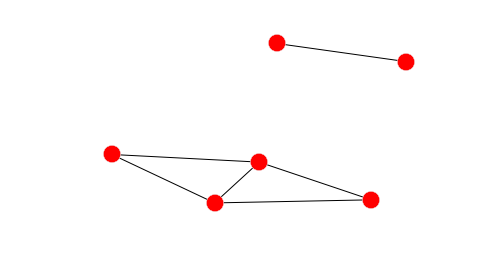

In [8]:
import random
import networkx as nx
G=nx.Graph()
for i in range(15) :
    G.add_edge ( random.randint(0,5),  random.randint(0,5) )

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,4))
nx.draw(G, ax = ax)

### Graphviz

[Graphviz](http://www.graphviz.org/) est un outil développé depuis plusieurs années déjà qui permet de réprésenter des graphes plus conséquents (> 500 noeuds). Il propose un choix plus riche de graphes : [gallerie](http://www.graphviz.org/Gallery.php). Il est utilisable via le module [graphviz](https://pypi.python.org/pypi/graphviz). Son installation requiert l'installation de l'outil [Graphviz](http://www.graphviz.org/) qui n'est pas inclus. La différence entre les deux modules tient dans l'algorithme utilisé pour assigner des coordonnées à chaque noeud du graphe de façon à ce que ses arcs se croisent le moins possibles. Au delà d'une certaine taille, le dessin de graphe n'est plus lisible et nécessite quelques tatônnements. Cela peut passer par une clusterisation du graphe (voir la [méthode Louvain](http://perso.uclouvain.be/vincent.blondel/research/louvain.html)) de façon à colorer certains noeuds proches voire à les regrouper.

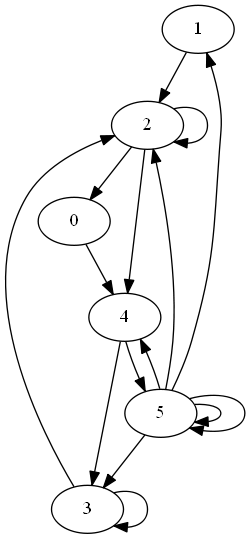

In [9]:
import random, os
from graphviz import Digraph
from IPython.display import Image
from pyquickhelper.helpgen.default_conf import get_graphviz_dot
bin = os.path.dirname(get_graphviz_dot())
if bin not in os.environ["PATH"]:
    os.environ["PATH"] = os.environ["PATH"] + ";" + bin

dot = Digraph(comment='random graph', format="png")
for i in range(15) :
    dot.edge ( str(random.randint(0,5)),  str(random.randint(0,5)) )

img = dot.render('t_random_graph.gv')
Image(img)

### Exercice 5 : dessin d'un graphe avec networkx
    
On construit un graphe aléatoire, ses 20 arcs sont obtenus en tirant 20 fois deux nombres entiers entre 1 et 10. Chaque arc doit avoir une épaisseur aléatoire. On regardera les fonctions [spring_layout](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring_layout#networkx.drawing.layout.spring_layout), [draw_networkx_nodes](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html?highlight=draw_networkx_nodes#networkx.drawing.nx_pylab.draw_networkx_nodes), [draw_networkx_edges](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html?highlight=draw_networkx_edges#networkx.drawing.nx_pylab.draw_networkx_edges). La [gallerie](https://networkx.github.io/documentation/latest/gallery.html) peut aider aussi.

## Cartographie

Dessiner une carte n'est pas difficile en soit. Toute la difficulté vient du fait qu'on a besoin pour lire cette carte de point de référence : les rues pour une ville, les frontières pour un département, une région, un pays, les fleuves et montagnes pour une carte représentation des données démographiques. Ces informations sont importantes pour situer l'information représentée par le graphique. Si vous n'avez pas besoin de tout ça, les formules suivantes vous suffiront :

- [Coordonnées sphériques](http://fr.wikipedia.org/wiki/Coordonn%C3%A9es_sph%C3%A9riques)
- [Conversion latitude/longitude to X/Y](http://www.movable-type.co.uk/scripts/latlong.html)
- [distance de Haversine](http://en.wikipedia.org/wiki/Haversine_formula)

Ces fonctionnalités sont disponibles via le module [geopy](https://github.com/geopy/geopy). Dans le cas contraire, voici quelques directions :

- [basemap](http://matplotlib.org/basemap/index.html) : les exemples de la documentation sont assez longs, le module permet de superposer sur la même carte de nombreuses informations, les frontières, la direction des vents ou des courants. Le téléchargement du module prend un peu de temps (100 Mo) à cause de toutes ces données.
- [shapely](https://github.com/Toblerity/Shapely) : ce module est utile pour dessiner des aires sur des cartes. Sous Windows, il faut l'installer depuis [Unofficial Windows Binaries for Python Extension Packages](http://www.lfd.uci.edu/~gohlke/pythonlibs/) car il inclut la DLL ``geos_c.dll`` qui vient de [GEOS](http://trac.osgeo.org/osgeo4w/). Dans le cas contraire, il faut installer [GEOS](http://trac.osgeo.org/osgeo4w/), ce qui prend pas mal de temps. Il est utilisé par  [cartopy](http://scitools.org.uk/cartopy/).

Il en existe d'autres mais leur installation recèle quelques difficultés que je n'ai pas eu la patience de contourner :

- [cartopy](http://scitools.org.uk/cartopy/) : les exemples sont plus courts, mais il télécharge les données au moment où il en a besoin
- [mapnik](http://mapnik.org/) : l'installation sur Windows est réservée aux connaisseurs


L'exemple qui suit utilise [basemap](http://matplotlib.org/basemap/index.html). Il est tiré de la page [BaseMap](http://nbviewer.ipython.org/github/rdhyee/working-open-data/blob/master/notebooks/Day_14_basemap_redux.ipynb).

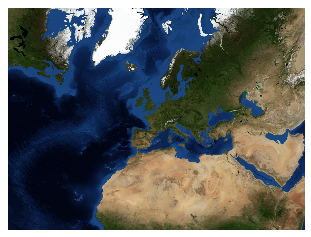

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=44,lat_2=52,lat_0=48,lon_0=2.34)
m.bluemarble()

Le suivant montre l'Europe et ses pays avec une projection différente ([Setting up the map](http://matplotlib.org/basemap/users/mapsetup.html)). Quelques recherches sur Internet permettent d'aboutir rapidement à des tutoriels comme celui-ci : [Visualization: Mapping Global Earthquake Activity](http://introtopython.org/visualization_earthquakes.html).

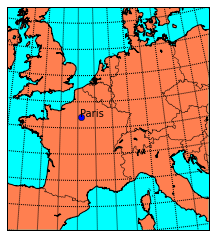

In [11]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
m = Basemap(llcrnrlon=-5,llcrnrlat=40,urcrnrlon=20,urcrnrlat=56,
            resolution='i',projection='cass',lon_0=2.34,lat_0=48)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-40,61.,2.))
m.drawmeridians(np.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='aqua')

# on ajoute Paris sur la carte
lon = 2.3488000
lat = 48.853410
x,y = m(lon, lat)
m.plot(x, y, 'bo', markersize=6)
plt.text(x, y, "Paris")

### Cartes avec les départements

Pour dessiner des formes sur une carte, il faut connaître les coordonnées de ces formes. L'article suivant 
lire [Matplotlib Basemap tutorial 10: Shapefiles Unleached, continued](http://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued/) permet de dessiner les départements belges. On va s'en inspirer pour dessiner les départements français. La première chose à faire est de récupérer des données géographiques. Une fois simple de les trouver est d'utiliser un moteur de recherche avec le mot clé **shapefile** inclus dedans : c'est le format du fichier. *shapefile france* permet d'obtenir quelques sources. En voici d'autres :

* [GADM](http://www.gadm.org/) : database of Global Administrative Areas
* [OpenData.gouv commune](https://www.data.gouv.fr/fr/datasets/geofla-communes/) : base de données sur data.gouv.fr
* [The National Map Small-Scale Collection][http://nationalmap.gov/small_scale/#chpbound) : Etats-Unis
* [ArcGIS](https://developers.arcgis.com/javascript/jsapi/esri.basemaps-amd.html) : API Javascripts
* [Natural Earth](http://www.naturalearthdata.com/) : Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software.
* [thematicmapping](http://thematicmapping.org/downloads/world_borders.php) : World Borders Dataset
* [OpenStreetMap Data Extracts](http://download.geofabrik.de/) : OpenStreetMap data
* [OpenStreetMapData](http://openstreetmapdata.com/) : OpenStreetMap data
* [Shapefile sur Wikipedia](http://wiki.openstreetmap.org/wiki/Shapefiles) : contient divers liens vers des sources de données

La première chose à vérifier est la licence associées aux données : on ne peut pas en faire ce qu'on veut. Pour cet exemple, j'ai choisi la première source de données, GADM. La licence n'est pas précisée explicitement (on peut trouver *happy to share* sur le site, la page wikipedia [https://en.wikipedia.org/wiki/GADM](https://en.wikipedia.org/wiki/GADM) précise :

*GADM is not freely available for commercial use. The GADM project created the spatial data for many countries from spatial databases provided by national governments, NGO, and/or from maps and lists of names available on the Internet (e.g. from Wikipedia).*

En guise d'exemple, cela suffit. On télécharge les données françaises [FRA_adm.zip](http://biogeo.ucdavis.edu/data/gadm2.7/shp/FRA_adm.zip).

In [3]:
from pyensae import download_data
download_data("FRA_adm.zip", website="http://biogeo.ucdavis.edu/data/gadm2.7/shp/")

    downloading of  http://biogeo.ucdavis.edu/data/gadm2.7/shp/FRA_adm.zip  to  FRA_adm.zip
    unzipped  FRA_adm0.cpg  to  .\FRA_adm0.cpg
    unzipped  FRA_adm0.csv  to  .\FRA_adm0.csv
    unzipped  FRA_adm0.dbf  to  .\FRA_adm0.dbf
    unzipped  FRA_adm0.prj  to  .\FRA_adm0.prj
    unzipped  FRA_adm0.shp  to  .\FRA_adm0.shp
    unzipped  FRA_adm0.shx  to  .\FRA_adm0.shx
    unzipped  FRA_adm1.cpg  to  .\FRA_adm1.cpg
    unzipped  FRA_adm1.csv  to  .\FRA_adm1.csv
    unzipped  FRA_adm1.dbf  to  .\FRA_adm1.dbf
    unzipped  FRA_adm1.prj  to  .\FRA_adm1.prj
    unzipped  FRA_adm1.shp  to  .\FRA_adm1.shp
    unzipped  FRA_adm1.shx  to  .\FRA_adm1.shx
    unzipped  FRA_adm2.cpg  to  .\FRA_adm2.cpg
    unzipped  FRA_adm2.csv  to  .\FRA_adm2.csv
    unzipped  FRA_adm2.dbf  to  .\FRA_adm2.dbf
    unzipped  FRA_adm2.prj  to  .\FRA_adm2.prj
    unzipped  FRA_adm2.shp  to  .\FRA_adm2.shp
    unzipped  FRA_adm2.shx  to  .\FRA_adm2.shx
    unzipped  FRA_adm3.cpg  to  .\FRA_adm3.cpg
    unzipped  F

['.\\FRA_adm0.cpg',
 '.\\FRA_adm0.csv',
 '.\\FRA_adm0.dbf',
 '.\\FRA_adm0.prj',
 '.\\FRA_adm0.shp',
 '.\\FRA_adm0.shx',
 '.\\FRA_adm1.cpg',
 '.\\FRA_adm1.csv',
 '.\\FRA_adm1.dbf',
 '.\\FRA_adm1.prj',
 '.\\FRA_adm1.shp',
 '.\\FRA_adm1.shx',
 '.\\FRA_adm2.cpg',
 '.\\FRA_adm2.csv',
 '.\\FRA_adm2.dbf',
 '.\\FRA_adm2.prj',
 '.\\FRA_adm2.shp',
 '.\\FRA_adm2.shx',
 '.\\FRA_adm3.cpg',
 '.\\FRA_adm3.csv',
 '.\\FRA_adm3.dbf',
 '.\\FRA_adm3.prj',
 '.\\FRA_adm3.shp',
 '.\\FRA_adm3.shx',
 '.\\FRA_adm4.cpg',
 '.\\FRA_adm4.csv',
 '.\\FRA_adm4.dbf',
 '.\\FRA_adm4.prj',
 '.\\FRA_adm4.shp',
 '.\\FRA_adm4.shx',
 '.\\FRA_adm5.cpg',
 '.\\FRA_adm5.csv',
 '.\\FRA_adm5.dbf',
 '.\\FRA_adm5.prj',
 '.\\FRA_adm5.shp',
 '.\\FRA_adm5.shx',
 '.\\license.txt']

La license accompagne les données :
    
*These data were extracted from the GADM database (www.gadm.org), version 2.5, July 2015. They can be used for non-commercial purposes only.  It is not allowed to redistribute these data, or use them for commercial purposes, without prior consent.*

Pour un usage commercial, il faudra utiliser une autre source de données comme celle proposée par data.gouv.fr [GEOFLA® Départements](https://www.data.gouv.fr/fr/datasets/geofla-departements-30383060/) qui est soumis à la licence [etalab](https://www.etalab.gouv.fr/licence-ouverte-open-licence). Comme dans l'exemple proposé plus haut, on lit les données :

In [16]:
import shapefile
r = shapefile.Reader("fra_adm3")
shapes = r.shapes()
records = r.records()
len(shapes), len(records)

(350, 350)

In [20]:
shapes[0].__dict__

{'bbox': [7.485558986663932, 48.69053649902361, 8.107298851013212, 49.041690826416286],
 'parts': [0],
 'points': [[7.703419685363713, 48.935829162597656],
  [7.717102527618522, 48.922370910644645],
  [7.720583915710449, 48.90651321411133],
  [7.706304073333797, 48.90758895874035],
  [7.693669319152946, 48.90281677246111],
  [7.697267532348633, 48.890766143799055],
  [7.70648002624506, 48.88809585571312],
  [7.687735080718994, 48.883834838867244],
  [7.68739843368536, 48.87797164917015],
  [7.706393241882438, 48.879741668701286],
  [7.707155704498348, 48.88046646118187],
  [7.711010932922477, 48.872360229492415],
  [7.719671249389648, 48.87117004394531],
  [7.723189830780143, 48.868862152099666],
  [7.747834682464713, 48.86820220947277],
  [7.7588915824890705, 48.87860107421892],
  [7.772598743438834, 48.883583068847656],
  [7.807376861572266, 48.87720108032249],
  [7.814932346343937, 48.88592529296881],
  [7.800405502319393, 48.89002227783203],
  [7.806757926940918, 48.90228271484398]

In [18]:
records[0]

[79,
 'FRA',
 'France',
 1,
 'Alsace',
 1,
 'Bas-Rhin',
 1,
 'Haguenau',
 'Arrondissement',
 'Districts',
 b'                                                                           ',
 b'                                                                                                    ']

Puis je récupère le code final en l'adaptant pour la France. Et comme rien ne marche jamais du premier coup, je suis tombé sur une erreur :

*ValueError: All values in the dash list must be positive*

Après avoir enlevé les lignes une à une, on trouve que c'est le dessin des méridiens et des parallèles qui posent problème. Je les commente et on recentre un peu la carte.

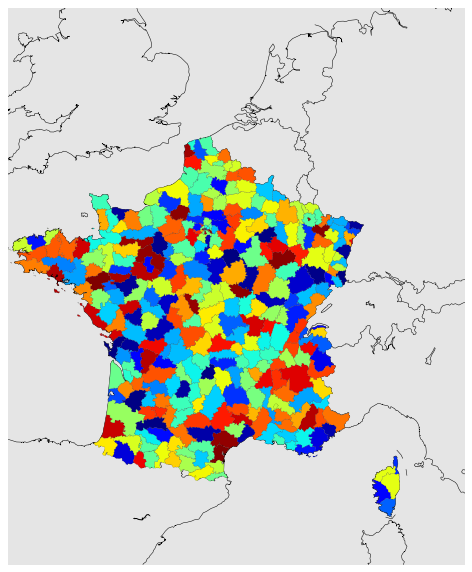

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
 
fig = plt.figure(figsize=(20,10))
#Custom adjust of the subplots
#plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -5.0
x2 = 12.
y1 = 40.
y2 = 54.
 
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
if False:
    # provoque l'erreur 
    # ValueError: All values in the dash list must be positive
    m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',
                    dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw parallels
    m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',
                    dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw meridians
 
from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile
 
r = shapefile.Reader("fra_adm3")
shapes = r.shapes()
records = r.records()
 
for record, shape in zip(records,shapes):
    lons,lats = zip(*shape.points)
    data = np.array(m(lons, lats)).T
 
    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])
 
    lines = LineCollection(segs,antialiaseds=(1,))
    # pour changer les couleurs c'est ici, il faudra utiliser le champ records
    # pour les changer en fonction du nom du départements
    lines.set_facecolors(cm.jet(np.random.rand(1)))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)

### Cartes interactives

La vidéo [Spatial data and web mapping with Python](http://www.youtube.com/watch?v=qmgh14LUOjQ&feature=youtu.be) vous en dira un peu plus sur la cartographie. Lorsqu'on dessine une carte avec les rues d'une ville, on veut pouvoir zoomer et dézoomer facilement pour avoir une vue d'ensemble ou une vue détaillé. Dans ce cas là, il faut utiliser un service externe telle que [Gmap API](https://developers.google.com/maps/?hl=FR), [Bing Map API](http://www.microsoft.com/maps/choose-your-bing-maps-API.aspx), [Yahoo Map API](https://developer.yahoo.com/maps/simple/V1/) ou [OpenStreetMap](https://openstreetmap.fr/) qui est une version open source. Dans tous les cas, il faut faire attention si les données que vous manipulez dans la mesure où elles transitent par un service externe. L'article [Busy areas in Paris](http://www.xavierdupre.fr/blog/2013-09-26_nojs.html) est un exemple d'utilisation d'[OpenStreetMap](https://openstreetmap.fr/). Ce qu'on cherche avant tout, c'est un [graphique interactif](#inter). Il existe des modules qui permettent d'utiliser ces services directement depuis un notebook python. [smopy](https://github.com/rossant/smopy) crée une carte non interactive :

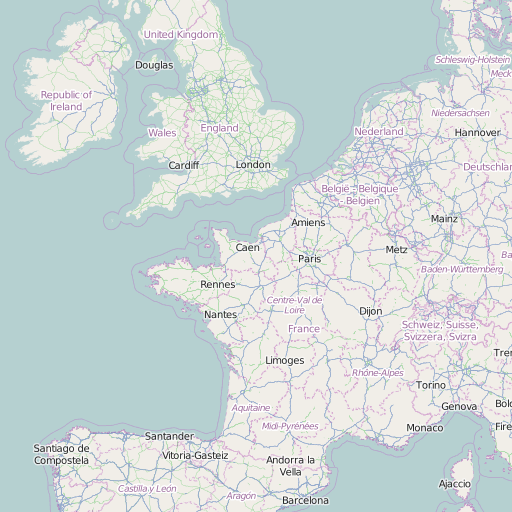

In [2]:
import smopy
map = smopy.Map((42., -1., 55., 3.), z=5)
map.show_ipython()

Le module [folium](https://github.com/wrobstory/folium) insert du javascript dans le notebook lui-même. Voici un exemple construit à partir de ce module : [Creating Interactive Election Maps Using folium and IPython Notebooks](http://blog.ouseful.info/2015/04/17/creating-interactive-election-maps-using-folium-and-ipython-notebooks/). Il est prévu pour fonctionner comme suit. D'abord, une étape d'initialisation :

In [ ]:
import folium
folium.initialize_notebook()  # crée une exception

Et si elle fonctionne (un jour peut-être), la suite devrait être :

In [6]:
map_osm = folium.Map(location=[48.85, 2.34])
map_osm.display()

Donc, on prend un raccourci et on en profite pour ajouter un triangle à l'emplacement de l'ENSAE :

In [27]:
import folium
map_osm = folium.Map(location=[48.85, 2.34])
from pyensae.notebook_helper import folium_inline_map
map_osm.polygon_marker(location=[48.824338, 2.302641], popup='ENSAE', 
                       fill_color='#132b5e', num_sides=3, radius=10)
folium_inline_map(map_osm)

Un moteur de recherche vous donnera rapidement quelques exemples de cartes utilisant ce module :
[Folium Polygon Markers](http://bl.ocks.org/wrobstory/5609786), [Easy interactive maps with folium](https://ocefpaf.github.io/python4oceanographers/blog/2014/05/05/folium/), [Plotting shapefiles with cartopy and folium](https://ocefpaf.github.io/python4oceanographers/blog/2015/02/02/cartopy_folium_shapefile/).

<h2 id="inter">Graphiques interactifs</h2>

Ce sujet sort du cadre de cette séance. Un graphique interactif réagit à des événéments comme le passage du curseur de la souris, un clic, un zoom. Il est difficile de lire un graphique trop chargé, c'est pourquoi en rendant le graphique interactifs, on cherche à donner plus d'information sans nuire à sa lisibilité. Voici quelques scénarios :

- On veut représenter une des dimensions du problème en animant le graphique. C'est fréquent en 3D où un des axes est celui du temps. On préfèrera un graphique en 2D évoluant dans le temps.
- Lorsqu'il y a trop de courbes à dessiner, le lecteur peut activer ou désactiver certaines courbes pour pouvoir les comparer. 
- On peut permettre de changer d'échelle (logarithmique ou changer la base 100 à différents endroits).
- On veut donner une vue d'ensemble et en même temps un niveau de détails plus fin si le lecteur le demande.

Ces animations pris leur essor avec internet et le langage [javascript](http://fr.wikipedia.org/wiki/JavaScript). Concevoir un graphique animé nécessite plus de temps car il faut prévoir ce qu'il doit se passer en cas d'action du lecteur (souris, touche, ...). Les modules python permettant de les créer construisent en fait un code javascript qu'il faut ensuite exécuter dans un navigateur (ou directement dans un notebook comme celui-ci). La librairie javascript qui a changé la façon de les concevoir est [d3.js](http://d3js.org/). Beaucoup d'autres librairies sont des surcouches de celle-ci [nvd3](http://nvd3.org/). 

Le module [plotly](https://plot.ly/python/) est intéressant mais toutes les fonctionnalités ne sont pas gratuites. De plus, il faut créer un compte pour pouvoir s'en servir. Le module [mpld3](http://mpld3.github.io/) est intéressant dans le sens où il convertit un graphique créé avec un matplotlib en un graphique javascript réalisé avec [d3.js](http://d3js.org). Il faut d'abord activer la sortie notebook (voir [D3 Plugins: Truly Interactive Matplotlib In Your Browser](http://jakevdp.github.io/blog/2014/01/10/d3-plugins-truly-interactive/)).

In [14]:
import mpld3
mpld3.enable_notebook()

Ensuite, les graphiques réalisés avec matplotlib seront affichés en javascript (si cela ne fonctionne pas, il ne faut pas hésiter à redémarrer le Kernel). Il faut cliquer sur le graphique pour que celui-ci deviennent zoomable.

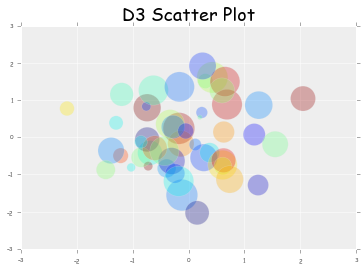

In [28]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot", size=18)

Il n'existe pas encore un module incontournable. Un de ceux qui pourrait devenir une référence est le module [bokeh](http://bokeh.pydata.org/). Il n'utilise pas [d3.js](http://d3js.org/) mais le principe est le même.


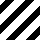
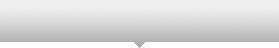
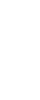
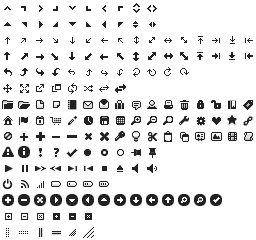
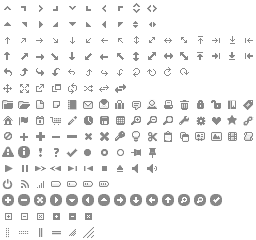
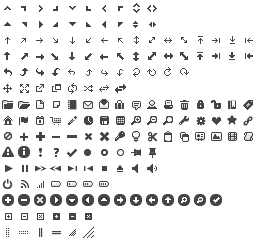
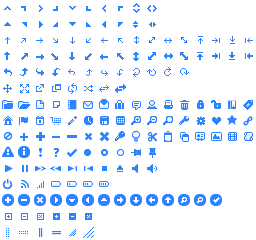
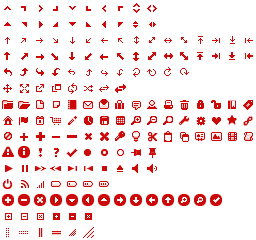
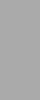
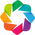
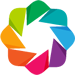
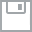
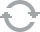
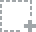
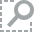
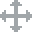
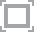
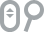

In [16]:
import bokeh, bokeh.plotting as bplt
bplt.output_notebook()

Une fois que le module est initialisé, on peut afficher son graphique.

In [30]:
p = bplt.figure(title = "Exemple")
p.xaxis.axis_label = 'X'
p.yaxis.axis_label = 'Y'

p.circle([1,2,3,4],[4,5,6,5.5], fill_color="red", color="red", size=12)
bplt.show(p)

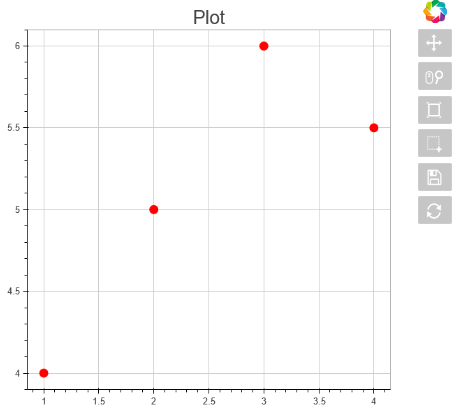

In [27]:
from pyquickhelper import NbImage  # seconde image
NbImage("pngbokeh.png")            # pour la conversion des notebooks au format HTML

Pour sauver le graph sous forme de fichier HTML :

In [32]:
import os
bplt.output_file("example_bokeh.html")
bplt.save(p)
print([ _ for _ in os.listdir(".") if "html" in _ ] )

Session output file 'example_bokeh.html' already exists, will be overwritten.
['example_bokeh.html', 'osm.html']
